In [9]:
import numpy as np
import matplotlib.pyplot as plt

Input:

In [10]:
lambda_ = 632.8e-9  # wavelength of radiation in meters (red laser)
L = 2.0             # distance from the object to the observation plane in meters
w = 0.001             # width of the rectangle in meters
h = 0.001            # height of the rectangle in meters
A_0 = 1             # amplitude of the wave inside the rectangle

Grid size and pitch:

In [11]:
size = 1024
step = 0.1e-3    

Creating a coordinate grid:

In [12]:
x = np.linspace(-size * step / 2, size * step / 2, size)
y = np.linspace(-size * step / 2, size * step / 2, size)
X, Y = np.meshgrid(x, y)

Setting the amplitude distribution for a rectangle:

In [13]:
A = np.where((np.abs(X) <= w/2) & (np.abs(Y) <= h/2), A_0, 0)

Function for calculating the diffraction pattern:

In [14]:
def fraunhofer_diffraction(A, lambda_, L):
    k = 2 * np.pi / lambda_
    factor = np.exp(1j * k * L) / (1j * lambda_ * L)
    U = factor * np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(A)))
    return np.abs(U)**2

Calculation of the diffraction pattern:

In [15]:
intensity = fraunhofer_diffraction(A, lambda_, L)

Visualization:

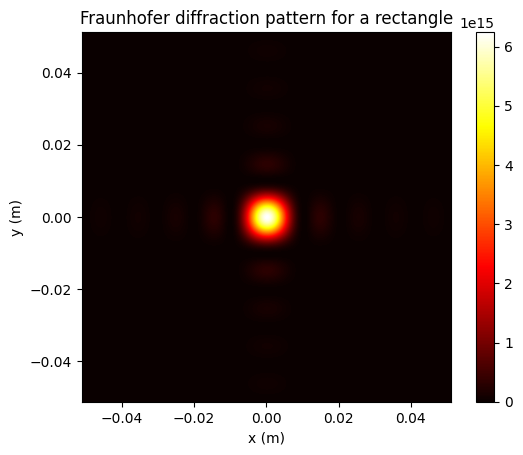

In [8]:
plt.imshow(intensity, cmap='hot', extent=(-size * step / 2, size * step / 2, -size * step / 2, size * step / 2))
plt.colorbar()
plt.title('Fraunhofer diffraction pattern for a rectangle')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()